In [1]:
import scipy
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import distributions

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.tip.values[:8]

array([1.01, 1.66, 3.5 , 3.31, 3.61, 4.71, 2.  , 3.12])

(array([14., 27., 55., 24., 41., 25., 20.,  7., 13.,  6.,  4.,  1.,  4.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

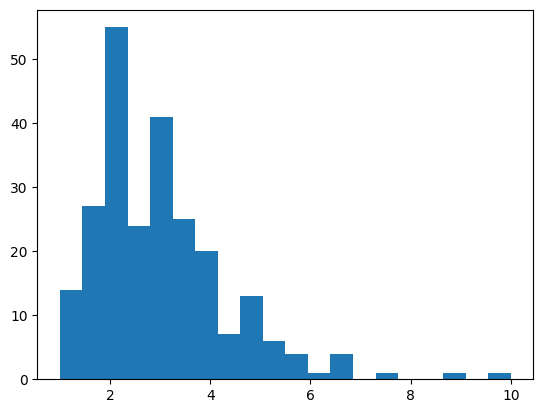

In [5]:
plt.hist(tips.tip, bins=20)

(array([ 6.,  4.,  2., 17., 10.,  6., 45., 18., 12., 36., 26.,  9., 21.,
        14.,  7.,  4.,  4.,  1.,  0.,  2.]),
 array([0.        , 0.11512925, 0.23025851, 0.34538776, 0.46051702,
        0.57564627, 0.69077553, 0.80590478, 0.92103404, 1.03616329,
        1.15129255, 1.2664218 , 1.38155106, 1.49668031, 1.61180957,
        1.72693882, 1.84206807, 1.95719733, 2.07232658, 2.18745584,
        2.30258509]),
 <BarContainer object of 20 artists>)

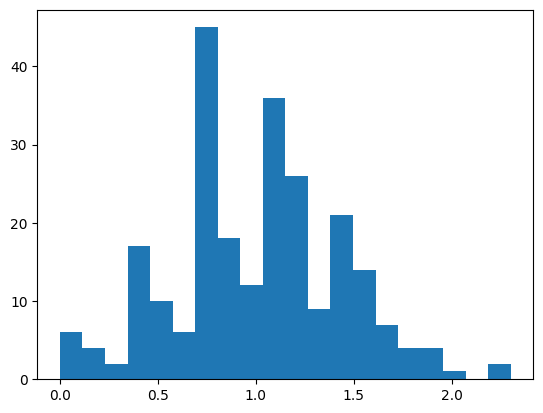

In [6]:
plt.hist(np.log(tips.tip), bins=20)

In [7]:
tips["logtip"]=np.log(tips.tip)

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,logtip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.009950
1,10.34,1.66,Male,No,Sun,Dinner,3,0.506818
2,21.01,3.50,Male,No,Sun,Dinner,3,1.252763
3,23.68,3.31,Male,No,Sun,Dinner,2,1.196948
4,24.59,3.61,Female,No,Sun,Dinner,4,1.283708


In [9]:
m,s=stats.norm.fit(tips.logtip)

In [10]:
m,s

(1.0025376996300006, 0.4352662333177251)

In [11]:
ecdf=sm.distributions.ECDF(tips.logtip)

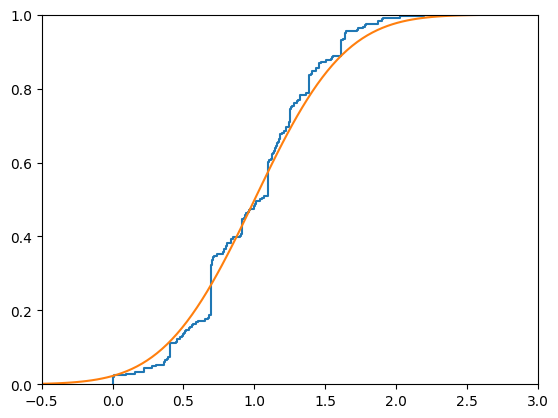

In [12]:
plt.axis([-0.5,3,0,1])
t1=np.linspace(-0.5,3,100)
t2=stats.norm.cdf(t1,loc=m, scale=0.5)
plt.step(ecdf.x, ecdf.y)
plt.plot(t1,t2)

((array([-2.7660794 , -2.46319801, -2.29114787, -2.16825434, -2.07137443,
         -1.99075074, -1.9213089 , -1.86005848, -1.80508277, -1.75507658,
         -1.70910939, -1.66649348, -1.62670558, -1.58933792, -1.55406631,
         -1.52062855, -1.48880944, -1.45843008, -1.42934008, -1.40141172,
         -1.37453559, -1.34861722, -1.32357442, -1.29933525, -1.27583633,
         -1.25302156, -1.230841  , -1.20924999, -1.18820845, -1.16768023,
         -1.14763264, -1.12803597, -1.10886319, -1.09008958, -1.07169252,
         -1.0536512 , -1.03594646, -1.01856064, -1.00147737, -0.98468148,
         -0.96815887, -0.95189643, -0.93588192, -0.9201039 , -0.90455168,
         -0.88921522, -0.87408512, -0.85915251, -0.84440907, -0.82984693,
         -0.81545867, -0.80123728, -0.78717613, -0.77326892, -0.75950968,
         -0.74589275, -0.73241275, -0.71906453, -0.70584322, -0.69274417,
         -0.67976291, -0.66689521, -0.65413699, -0.64148438, -0.62893363,
         -0.61648119, -0.60412361, -0.

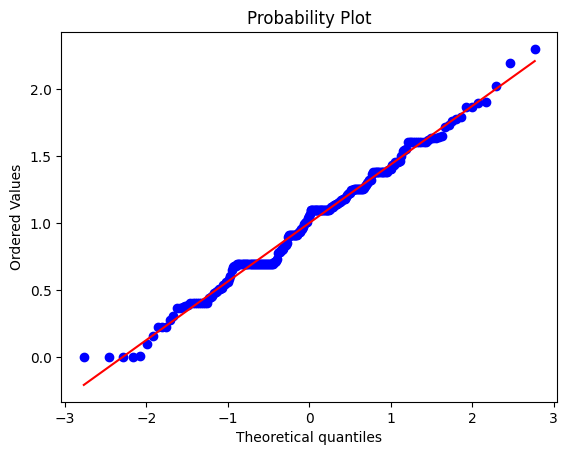

In [13]:
stats.probplot(tips.logtip,dist=stats.norm, plot=plt)

In [14]:
test1=stats.skewtest(tips.logtip)

In [15]:
test1

SkewtestResult(statistic=0.49672635658719194, pvalue=0.619382033531661)

In [16]:
stats.kurtosistest(tips.logtip)

KurtosistestResult(statistic=-0.5011192568367938, pvalue=0.6162871950497942)

In [17]:
stats.shapiro(tips.logtip)

ShapiroResult(statistic=0.9888468157351475, pvalue=0.056207717607826786)

In [18]:
norm1=stats.norm(m,s)

In [19]:
stats.kstest(tips.logtip,norm1.cdf)

KstestResult(statistic=0.0908346084933565, pvalue=0.033449454468464035, statistic_location=0.7080357930536959, statistic_sign=1)

In [20]:
norm2=stats.norm(m,0.5)

In [21]:
stats.kstest(tips.logtip,norm2.cdf)

KstestResult(statistic=0.08360407822104635, pvalue=0.06229614845052134, statistic_location=0.6931471805599453, statistic_sign=-1)

In [22]:
N=tips.day.value_counts()

In [23]:
N

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [24]:
stats.chisquare(N, np.r_[0.3, 0.3, 0.3, 0.1]*N.sum())

Power_divergenceResult(statistic=5.617486338797814, pvalue=0.13177808288801446)

In [25]:
stats.ttest_1samp(tips.logtip,popmean=1.05)

TtestResult(statistic=-1.6997965487121514, pvalue=0.09044877787141524, df=243)

In [26]:
logtip_smoker = [z[1] for z in tips.logtip.groupby(tips.smoker)]

In [27]:
pd.DataFrame([(y.mean(), y.var(ddof=1), *stats.shapiro(y))
    for y in logtip_smoker],
    columns = ["mean","var","statistic","p_value"])

,mean,var,statistic,p_value
0,1.005282,0.195278,0.977275,0.104381
1,1.000848,0.188405,0.989688,0.335011


In [28]:
stats.bartlett(*logtip_smoker)

BartlettResult(statistic=0.0365538401463083, pvalue=0.8483762789164191)

In [29]:
stats.ttest_ind(logtip_smoker[0], logtip_smoker[1])

TtestResult(statistic=0.07696102513921424, pvalue=0.9387181402369299, df=242.0)

In [30]:
tips.logtip.groupby(tips.day, observed=True).mean()

day
Sun     1.105401
Sat     0.978022
Thur    0.932488
Fri     0.931926
Name: logtip, dtype: float64

In [31]:
logtip_smoker = [z[1] for z in tips.logtip.groupby(tips.day, observed=True)]
stats.f_oneway(*logtip_smoker)

F_onewayResult(statistic=2.233205110714639, pvalue=0.084991274983257)

In [32]:
import statsmodels.formula.api, statsmodels.api

In [33]:
model = statsmodels.formula.api.ols("logtip~C(day)", data=tips).fit()

In [34]:
statsmodels.api.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,1.255397,0.418466,2.233205,0.084991
Residual,240.0,44.972036,0.187383,NaN,NaN


In [35]:
model2 = statsmodels.formula.api.ols("logtip~C(time)+C(smoker)+C(time):C(smoker)", data=tips).fit()

In [36]:
statsmodels.api.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
C(time),1.0,0.640189,0.640189,3.383699,0.067079
C(smoker),1.0,0.000107,0.000107,0.000563,0.981086
C(time):C(smoker),1.0,0.179602,0.179602,0.949279,0.330884
Residual,240.0,45.407536,0.189198,NaN,NaN


In [107]:
litera = ["A","B","C","D","E","F"]
var=[]
shap = []
srednia = []
for i in range(len(litera)):
    with open('Dane'+litera[i]+'.txt', 'r') as file:
        data = [float(line.strip()) for line in file if line.strip()]

    # Obliczanie wariancji
    var.append(np.var(data, ddof=1))
    #print(f"Wariancja: {var[i]:.4f}")
    shap.append(stats.shapiro(data).pvalue)
    srednia.append(np.mean(data))
for i in range(len(var)):
    print(var[i], "\t", srednia[i], "\t", shap[i])

1.30729494354427 	 0.09618148285260038 	 0.9504746144427816
1.3221724480715626 	 -0.054486209565700036 	 0.9741848805123018
1.332465421361529 	 0.08469896363599443 	 0.7261475215755961
1.4160001384107515 	 0.5122971098111416 	 0.741466802402119
1.9686719882585941 	 -0.009962246921499905 	 0.2921788404109825
1.8927218111095 	 -0.33366892880353943 	 0.05208393894699351
